#                                      EDA 


#                No More Accidents ....

In [ ]:
# Analyse type of accidents

In [2]:
import pyodbc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import datetime
from scipy import stats
from   pandas import  DataFrame
from sklearn.model_selection import train_test_split
import time

In [3]:
df_Acc = pd.read_csv ('C:/Users/Leah/Desktop/Naya_Final_project_notebook/DS Final Project/AccidentsDataSource0.csv' , low_memory=False)


In [4]:
df_Acc.head()


,accident_day,accident_district,accident_district_hebrew,accident_hour,accident_hour_raw,accident_hour_raw_hebrew,accident_id,accident_minute,accident_month,accident_municipal_status,...,vehicle_attribution,vehicle_attribution_hebrew,vehicle_damage,vehicle_damage_hebrew,vehicle_status,vehicle_status_hebrew,vehicle_type,vehicle_type_hebrew,weather,weather_hebrew
0,8,44,רחובות,0,1,00:00-00:59,2008000002,0,6,NaN,...,1.0,ישראלי,NaN,NaN,NaN,NaN,1,רכב נוסעים פרטי,9,לא ידוע
1,16,44,רחובות,0,1,00:00-00:59,2008000004,0,5,NaN,...,1.0,ישראלי,NaN,NaN,NaN,NaN,2,משא עד 4 טון - אחוד (טרנזיט),1,בהיר
2,6,99,NaN,0,1,00:00-00:59,2008000006,0,5,99.0,...,1.0,ישראלי,NaN,NaN,NaN,NaN,17,אחר ולא ידוע,9,לא ידוע
3,1,43,רמלה,0,1,00:00-00:59,2008000007,0,7,NaN,...,1.0,ישראלי,NaN,NaN,NaN,NaN,3,משא עד 4 טון - לא אחוד (טנדר),1,בהיר
4,4,43,רמלה,0,1,00:00-00:59,2008000008,0,7,NaN,...,1.0,ישראלי,NaN,NaN,NaN,NaN,1,רכב נוסעים פרטי,9,לא ידוע


In [5]:
# df_Acc_Org_Y = df_Acc[list(df_Acc.loc[: ,"accident_severity" : "accident_severity_hebrew"])]




In [6]:
# df_Acc_Org_X = df_Acc[df_Acc.columns.difference(["accident_severity","accident_severity_hebrew"])]


In [7]:
# df_Acc_Org_Y.nunique()


In [8]:
# df_Acc_Org_Y['accident_severity_hebrew'].unique()

In [9]:
float_col = df_Acc.select_dtypes(include=['float64']) # This will select float columns only

print(float_col.columns.values)

# list(float_col.columns.values)
for col in float_col.columns.values:
    #print(col)
    if col =='road_segment_from_km'  or col == 'road_segment_length_km'  or col == 'road_segment_to_km':
        continue
    else :
        df_Acc[col] = df_Acc[col].astype('Int64')
  

['accident_municipal_status' 'accident_natural_area' 'accident_region'
 'accident_yishuv_shape' 'accident_yishuv_symbol' 'cross_location'
 'cross_mode' 'driving_directions' 'file_type_police' 'km' 'km_raw'
 'manufacturing_year' 'multi_lane' 'non_urban_intersection' 'one_lane'
 'road1' 'road2' 'road_control' 'road_intactness' 'road_segment_from_km'
 'road_segment_id' 'road_segment_length_km' 'road_segment_number'
 'road_segment_to_km' 'road_shape' 'road_width' 'seats' 'speed_limit'
 'street1' 'street2' 'total_weight' 'traffic_light' 'vehicle_attribution'
 'vehicle_damage' 'vehicle_status']


In [10]:
df_Acc.info(verbose=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808779 entries, 0 to 808778
Data columns (total 114 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    accident_day                               int64  
 1    accident_district                          int64  
 2    accident_district_hebrew                   object 
 3    accident_hour                              int64  
 4    accident_hour_raw                          int64  
 5    accident_hour_raw_hebrew                   object 
 6    accident_id                                int64  
 7    accident_minute                            int64  
 8    accident_month                             int64  
 9    accident_municipal_status                  Int64  
 10   accident_municipal_status_hebrew           object 
 11   accident_natural_area                      Int64  
 12   accident_natural_area_hebrew               object 
 13   accident_region            

Number of insignificant accidents(3):  782193
Number of badly accidents (2):  22638
Number of deadly accidents (1) :  3948


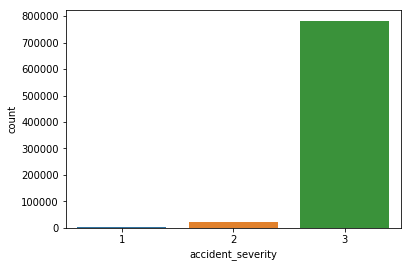

In [11]:
ax = sns.countplot(df_Acc["accident_severity"],label="Count")
easy, badly , fatal = df_Acc["accident_severity"].value_counts()
print('Number of insignificant accidents(3): ',easy)
print('Number of badly accidents (2): ',badly)
print('Number of deadly accidents (1) : ',fatal)

In [11]:
df_Acc.shape

(808779, 114)

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
df_Acc.dtypes

accident_day                 int64
accident_district            int64
accident_district_hebrew    object
accident_hour                int64
accident_hour_raw            int64
                             ...  
vehicle_status_hebrew       object
vehicle_type                 int64
vehicle_type_hebrew         object
weather                      int64
weather_hebrew              object
Length: 114, dtype: object

In [14]:
df_Acc.describe()

,accident_day,accident_district,accident_hour,accident_hour_raw,accident_id,accident_minute,accident_month,accident_municipal_status,accident_natural_area,accident_region,accident_severity,accident_type,accident_year,accident_yishuv_shape,accident_yishuv_symbol,car_id,cross_direction,cross_location,cross_mode,day_in_week,day_night,day_type,didnt_cross,driving_directions,engine_volume,file_type_police,geo_area,id,km,km_raw,location_accuracy,manufacturing_year,multi_lane,non_urban_intersection,object_distance,one_lane,police_unit,provider_and_id,provider_code,road1,road2,road_control,road_intactness,road_light,road_object,road_segment_from_km,road_segment_id,road_segment_length_km,road_segment_number,road_segment_to_km,road_shape,road_sign,road_surface,road_type,road_width,seats,speed_limit,street1,street2,total_weight,traffic_light,vehicle_attribution,vehicle_damage,vehicle_status,vehicle_type,weather
count,808779.000000,808779.000000,808779.000000,808779.000000,8.087790e+05,808779.000000,808779.000000,433941.000000,747275.000000,747275.000000,808779.000000,808779.000000,808779.000000,679040.000000,725738.000000,808779.000000,808779.000000,459642.000000,460019.000000,808779.000000,808779.000000,808779.000000,808779.000000,640973.000000,808779.000000,0,808779.000000,8.087790e+05,160831.000000,160831.000000,808779.000000,775734.000000,478426.000000,4.007600e+04,808779.000000,777152.000000,808779.000000,8.087790e+05,808779.000000,171835.000000,105824.000000,92786.000000,499443.000000,808779.000000,808779.000000,154039.000000,1.540390e+05,154039.000000,154039.000000,154039.000000,808777.000000,808779.000000,808779.000000,808779.000000,513026.000000,808578.000000,515969.000000,524541.000000,81530.000000,501743.000000,791338.000000,805528.000000,446768.000000,457554.000000,808779.000000,808779.000000
mean,15.634465,46.299218,13.181289,54.940311,2.013427e+09,18.227309,6.357431,26.641956,413.686904,4.772712,2.962247,4.690169,2013.384510,22.266031,4236.098103,1.392202,8.769402,0.228025,0.270213,3.643235,2.074242,3.896690,8.965398,416.897003,5.977106,<NA>,1.024154,9.501813e+06,713.888342,710.324378,2.273349,1895.419530,0.391009,1.076066e+04,8.901057,7.783817,30.896497,2.764348e+10,2.563005,402.400442,367.815250,3.877277,0.291160,8.208446,8.859637,68.299259,3.437013e+06,9.189747,113.893397,77.489005,8.647050,4.609615,7.424047,2.288922,0.824828,50.679276,0.618285,909.931189,852.724678,2.298336,8.447326,1.073100,2.618961,0.045603,4.648510,7.422161
std,8.783265,24.114498,5.145303,20.568673,3.673635e+06,16.584937,3.405940,43.801182,189.721123,8.903108,0.214688,4.049892,3.668229,22.493534,3142.861916,0.555444,1.307790,0.943569,1.020667,1.873951,1.772844,0.467962,0.371286,1110.548419,3.101815,<NA>,0.153526,8.360452e+05,883.851168,886.717972,1.566882,459.041767,0.980441,8.699978e+05,9.057180,2.789940,17.855336,8.264490e+09,0.826454,1368.488835,1387.381077,2.316573,0.480214,3.720603,0.852274,87.262812,1.181448e+07,12.782213,209.031768,88.759768,0.586252,0.817943,3.165705,0.872067,1.370554,46.853097,1.253647,1444.757496,989.067606,3.258800,2.064567,0.692597,1.488377,0.297478,5.951503,3.170168
min,1.000000,11.000000,0.000000,1.000000,2.008000e+09,0.000000,1.000000,0.000000,77.000000,1.000000,1.000000,1.000000,2008.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,<NA>,1.000000,8.168338e+06,0.000000,-478.000000,1.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,11.000000,1.200800e+10,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.001000e+04,0.100000,0.000000,0.200000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8.000000,31.000000,9.000000,39.000000,2.010044e+09,0.000000,3.000000,0.000000,246.000000,3.000000,3.000000,2.000000,2010.000000,13.000000,874.000000,1.000000,9.000000,0.000000,0.000000,2.000000,1.000000,4.000000,9.000000,0.000000,5.000000,<NA>

In [15]:
# df_Acc.accident_type = pd.Categorical(df_Acc.accident_type)
# df_Acc.accident_severity  = pd.Categorical(df_Acc.accident_severity)
# df_Acc.road_type  = pd.Categorical(df_Acc.road_type)
# df_Acc.location_accuracy = pd.Categorical(df_Acc.location_accuracy)
# df_Acc.road_shape = pd.Categorical(df_Acc.road_shape)
# df_Acc.day_type = pd.Categorical(df_Acc.day_type)
# df_Acc.police_unit  = pd.Categorical(df_Acc.police_unit)
# df_Acc.one_lane  = pd.Categorical(df_Acc.one_lane)
# df_Acc.one_lane = pd.Categorical(df_Acc.one_lane)


In [16]:
df_int_col = df_Acc.select_dtypes(include=['int64']) 
df_int_col

,accident_day,accident_district,accident_hour,accident_hour_raw,accident_id,accident_minute,accident_month,accident_municipal_status,accident_natural_area,accident_region,accident_severity,accident_type,accident_year,accident_yishuv_shape,accident_yishuv_symbol,car_id,cross_direction,cross_location,cross_mode,day_in_week,day_night,day_type,didnt_cross,driving_directions,engine_volume,file_type_police,geo_area,id,km,km_raw,location_accuracy,manufacturing_year,multi_lane,non_urban_intersection,object_distance,one_lane,police_unit,provider_and_id,provider_code,road1,road2,road_control,road_intactness,road_light,road_object,road_segment_id,road_segment_number,road_shape,road_sign,road_surface,road_type,road_width,seats,speed_limit,street1,street2,total_weight,traffic_light,vehicle_attribution,vehicle_damage,vehicle_status,vehicle_type,weather
0,8,44,0,1,2008000002,0,6,<NA>,441,4,3,1,2008,14,8400,1,9,<NA>,<NA>,1,5,2,9,<NA>,8,<NA>,1,8497204,<NA>,<NA>,1,2001,<NA>,<NA>,9,9,52,32008000002,3,<NA>,<NA>,<NA>,<NA>,6,9,<NA>,<NA>,9,5,9,2,<NA>,1,<NA>,461,<NA>,2,9,1,<NA>,<NA>,1,9
1,16,44,0,1,2008000004,0,5,<NA>,442,4,3,1,2008,10,8300,1,9,3,3,6,5,4,9,1023,9,<NA>,1,8197058,<NA>,<NA>,1,2004,<NA>,<NA>,9,1,52,12008000004,1,<NA>,<NA>,7,<NA>,6,9,<NA>,<NA>,8,5,1,1,1,99,1,149,150,3,9,1,<NA>,<NA>,2,1
2,6,99,0,1,2008000006,0,5,99,999,9,3,1,2008,99,<NA>,1,9,<NA>,<NA>,3,5,4,9,<NA>,0,<NA>,1,8177826,50,50,1,<NA>,<NA>,<NA>,9,9,52,12008000006,1,412,<NA>,<NA>,<NA>,6,9,4120020,20,9,5,9,4,<NA>,99,<NA>,<NA>,<NA>,<NA>,9,1,<NA>,<NA>,17,9
3,1,43,0,1,2008000007,0,7,<NA>,431,4,3,1,2008,15,7000,1,2,1,1,3,5,4,9,1023,9,<NA>,1,8175406,<NA>,<NA>,1,2001,<NA>,<NA>,9,9,52,12008000007,1,<NA>,<NA>,7,<NA>,6,9,<NA>,<NA>,8,5,1,1,5,4,1,403,363,2,9,1,<NA>,<NA>,3,1
4,4,43,0,1,2008000008,0,7,<NA>,431,4,3,1,2008,15,7000,1,9,<NA>,<NA>,6,5,4,9,<NA>,6,<NA>,1,8177867,<NA>,<NA>,3,1992,<NA>,<NA>,9,9,52,12008000008,1,<NA>,<NA>,<NA>,<NA>,6,9,<NA>,<NA>,9,5,9,2,<NA>,99,<NA>,700,<NA>,<NA>,9,1,<NA>,<NA>,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808774,5,11,20,81,2020099978,0,9,0,111,1,3,1,2020,12,3000,1,9,0,0,7,5,4,9,0,9,<NA>,1,10620541,<NA>,<NA>,3,2016,0,<NA>,9,9,61,32020099978,3,<NA>,<NA>,<NA>,0,6,9,<NA>,<NA>,9,5,9,2,0,3,0,4195,<NA>,2,9,1,4,0,3,9
808775,25,51,7,31,2020099979,30,1,0,511,5,3,1,2020,13,5000,1,9,0,8,7,1,4,4,4433,2,<NA>,1,10609282,<NA>,<NA>,1,2019,0,<NA>,9,3,20,12020099979,1,<NA>,<NA>,1,0,1,9,<NA>,<NA>,9,3,2,1,3,1,1,1631,2213,<NA>,0,1,1,0,9,1
808776,6,21,9,39,2020099984,30,1,0,212,2,3,8,2020,16,8000,1,9,0,0,2,1,4,9,0,5,<NA>,1,10632174,<NA>,<NA>,2,2016,0,<NA>,2,9,12,32020099984,3,<NA>,<NA>,<NA>,0,11,5,<NA>,<NA>,9,5,9,2,0,3,0,<NA>,<NA>,1,9,1,1,0,1,9
808777,27,51,11,46,2020099990,15,5,<NA>,511,5,3,3,2020,<NA>,0,1,9,0,0,4,1,4,9,0,6,<NA>,1,10623367,160,160,1,2015,0,<NA>,9,9,20,32020099990,3,20,0,<NA>,0,11,9,200013,13,9,5,9,4,0,3,0,<NA>,<NA>,1,9,1,4,0,1,9


In [19]:

print(df_Acc.info(verbose=True ,memory_usage='deep'), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808779 entries, 0 to 808778
Data columns (total 114 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    accident_day                               int64  
 1    accident_district                          int64  
 2    accident_district_hebrew                   object 
 3    accident_hour                              int64  
 4    accident_hour_raw                          int64  
 5    accident_hour_raw_hebrew                   object 
 6    accident_id                                int64  
 7    accident_minute                            int64  
 8    accident_month                             int64  
 9    accident_municipal_status                  Int64  
 10   accident_municipal_status_hebrew           object 
 11   accident_natural_area                      Int64  
 12   accident_natural_area_hebrew               object 
 13   accident_region            

In [20]:
for col in df_Acc:
    print(col + ' ' + str(df_Acc[col].nunique()))

accident_day 31
accident_district 43
accident_district_hebrew 23
accident_hour 24
accident_hour_raw 96
accident_hour_raw_hebrew 120
accident_id 794491
accident_minute 4
accident_month 12
accident_municipal_status 59
accident_municipal_status_hebrew 59
accident_natural_area 64
accident_natural_area_hebrew 59
accident_region 10
accident_region_hebrew 9
accident_severity 3
accident_severity_hebrew 3
accident_type 19
accident_type_hebrew 21
accident_year 13
accident_yishuv_name 1270
accident_yishuv_shape 30
accident_yishuv_shape_hebrew 48
accident_yishuv_symbol 1391
car_id 15
cross_direction 3
cross_direction_hebrew 3
cross_location 6
cross_location_hebrew 5
cross_mode 7
cross_mode_hebrew 6
day_in_week 7
day_in_week_hebrew 7
day_night 2
day_night_hebrew 2
day_type 4
day_type_hebrew 4
didnt_cross 9
didnt_cross_hebrew 8
driving_directions 73
driving_directions_hebrew 74
engine_volume 14
engine_volume_hebrew 14
file_type_police 0
geo_area 2
geo_area_hebrew 2
geom 117950
id 808779
km 3030
km_a

In [21]:
print(pd.isnull(df_Acc).mean())

accident_day                0.000000
accident_district           0.000000
accident_district_hebrew    0.130990
accident_hour               0.000000
accident_hour_raw           0.000000
                              ...   
vehicle_status_hebrew       0.986512
vehicle_type                0.000000
vehicle_type_hebrew         0.000000
weather                     0.000000
weather_hebrew              0.000000
Length: 114, dtype: float64


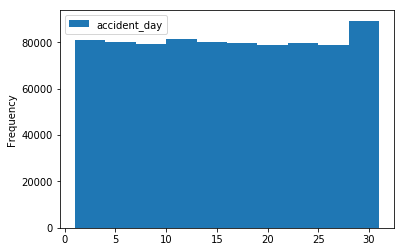

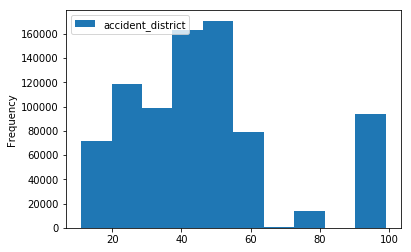

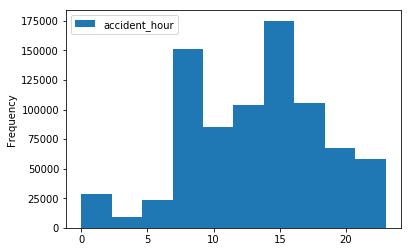

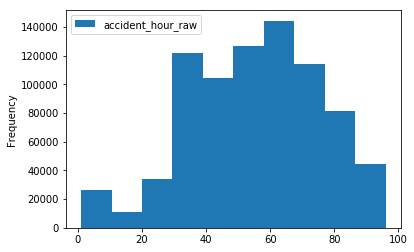

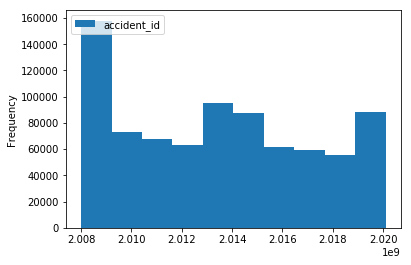

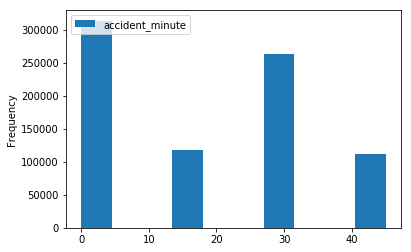

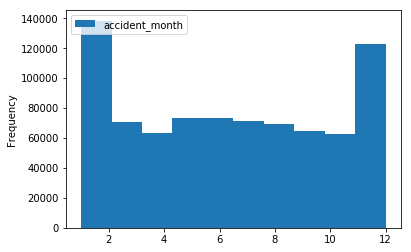

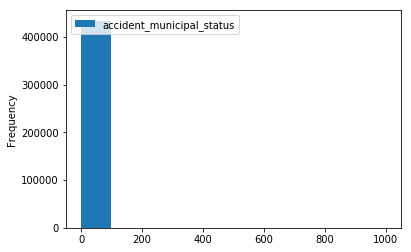

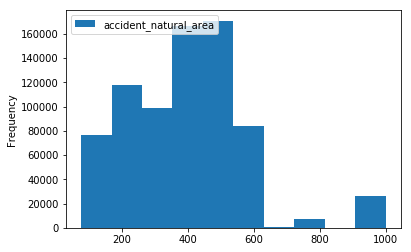

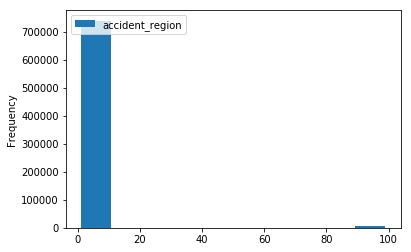

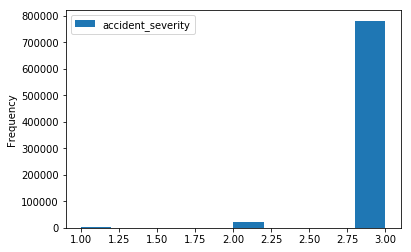

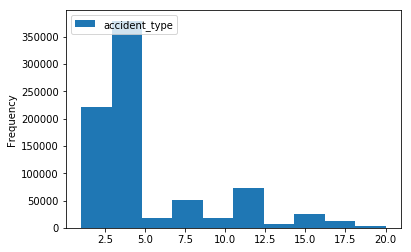

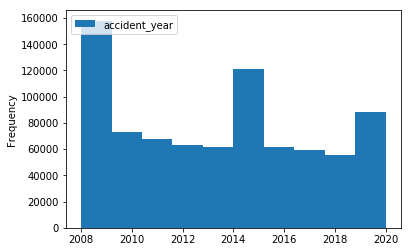

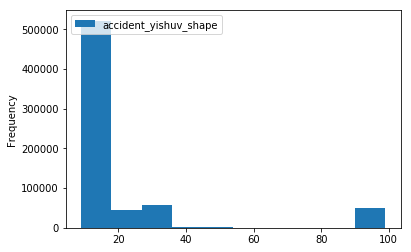

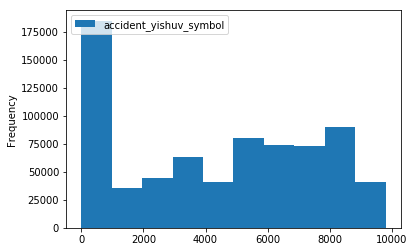

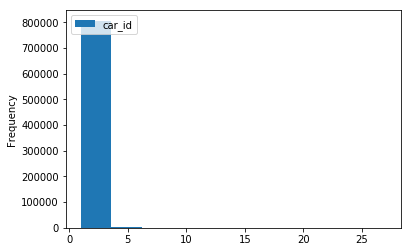

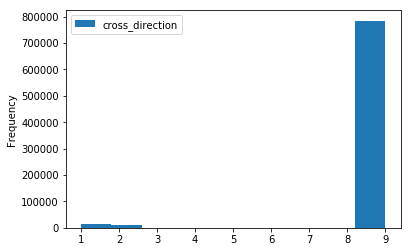

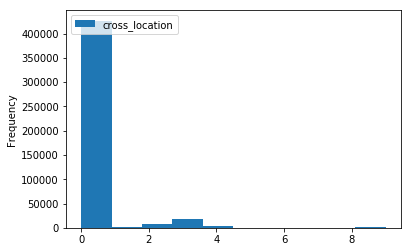

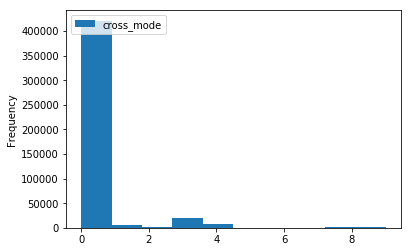

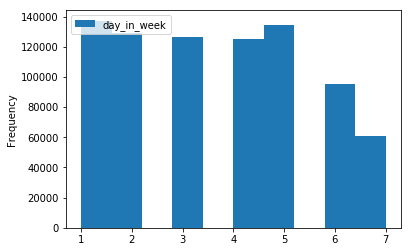

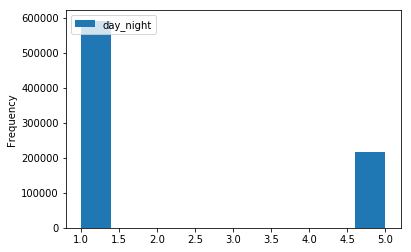

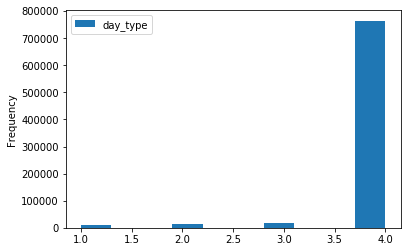

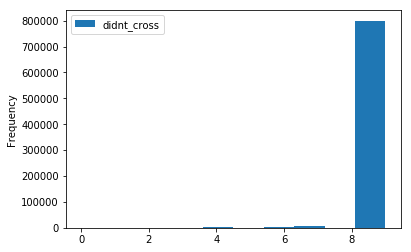

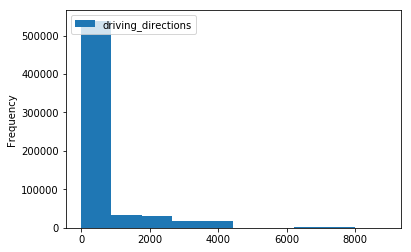

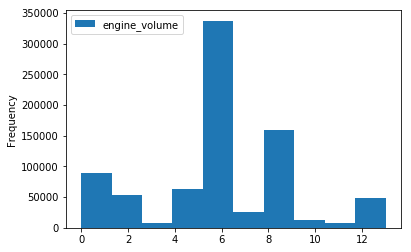

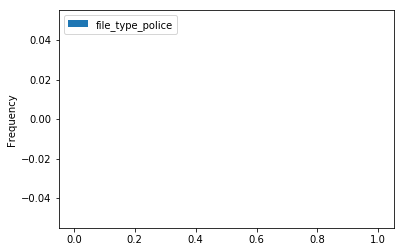

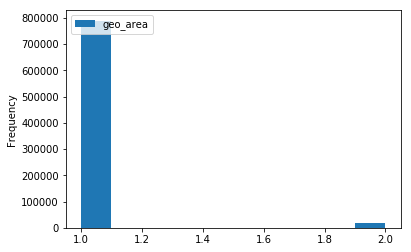

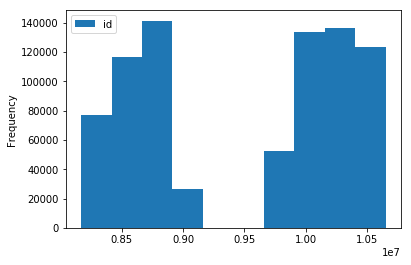

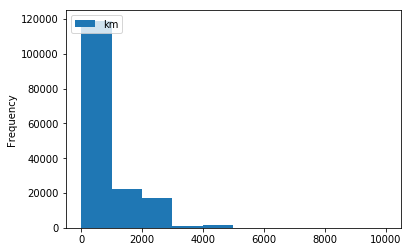

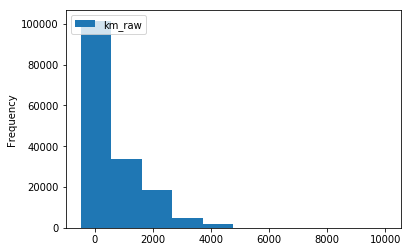

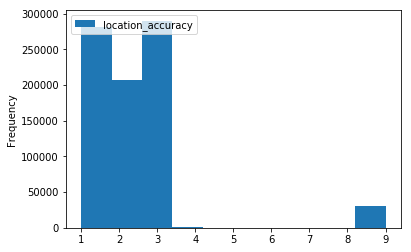

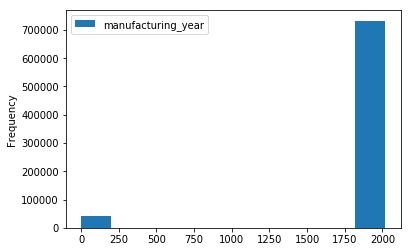

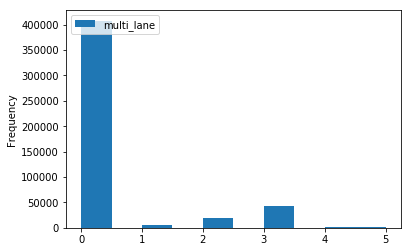

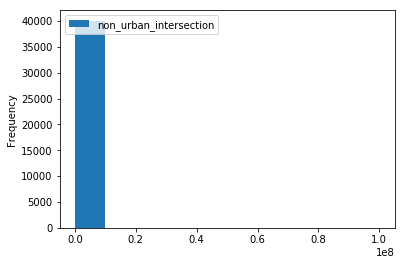

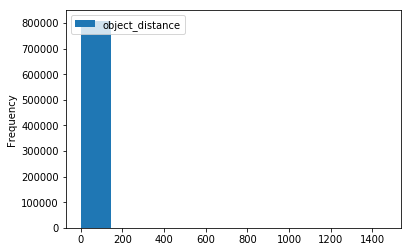

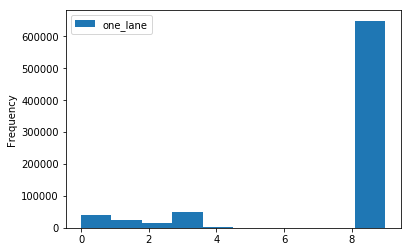

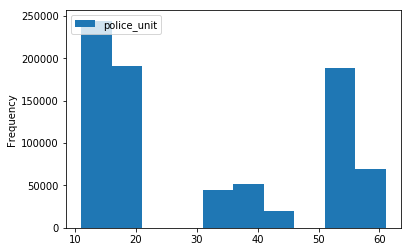

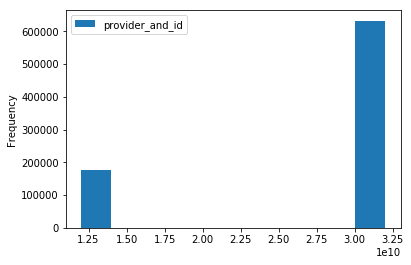

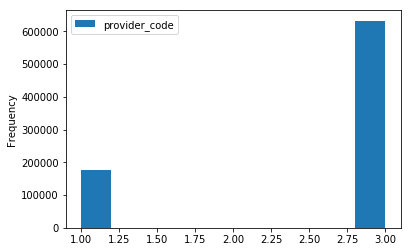

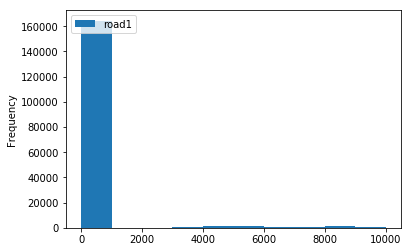

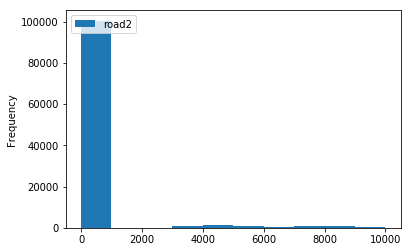

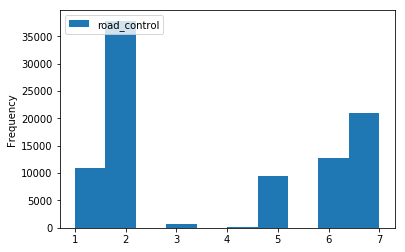

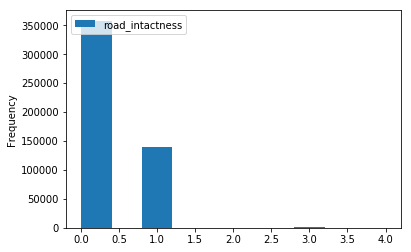

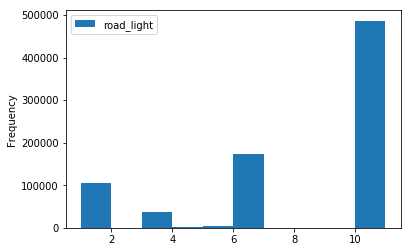

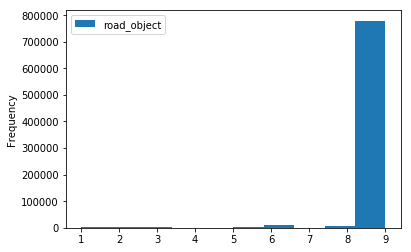

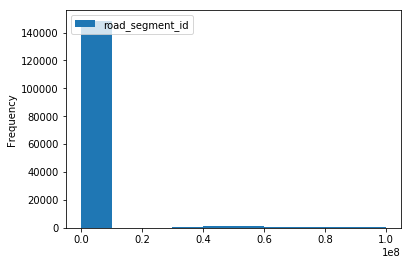

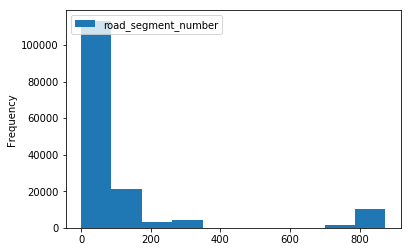

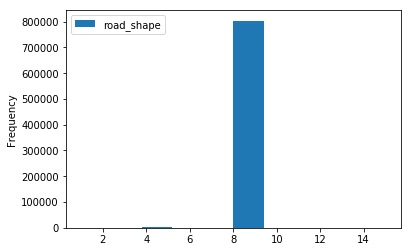

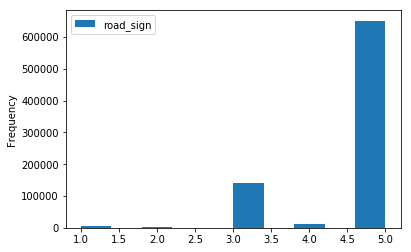

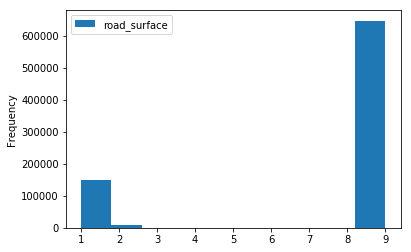

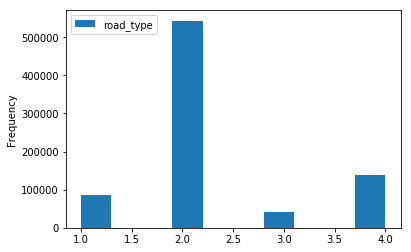

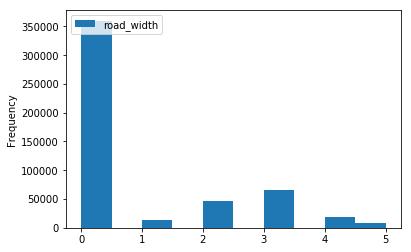

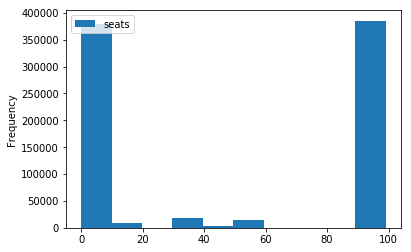

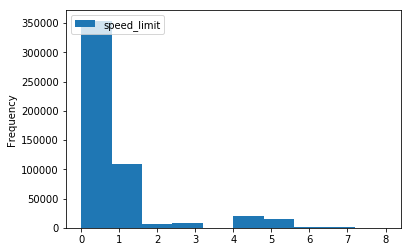

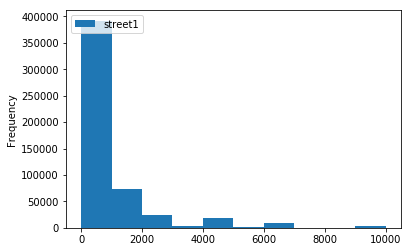

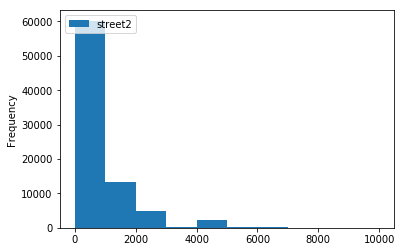

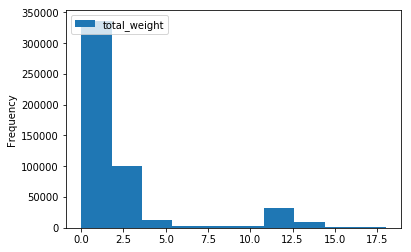

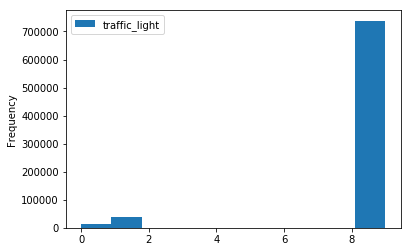

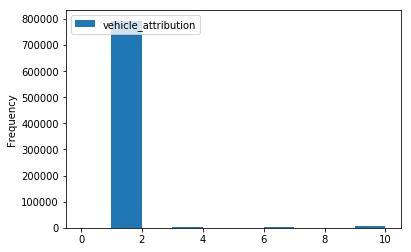

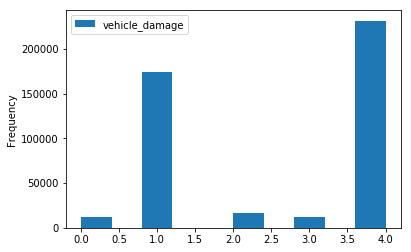

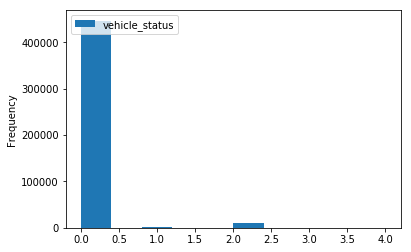

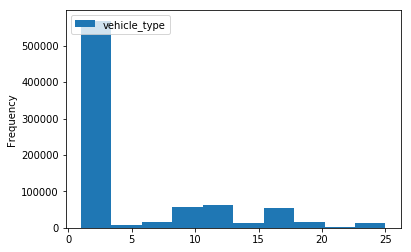

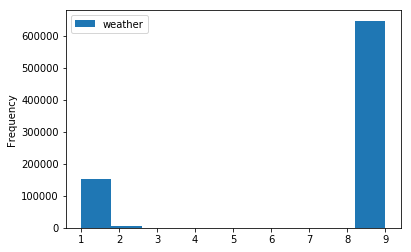

In [36]:


for column in df_int_col:
    
    df_int_col[column].plot(kind='hist' ) 
    plt.legend(loc='upper left')

    plt.show()


In [18]:
df_int_col = df_Acc.select_dtypes(include=['int64']) # This will select float columns only

df_int_col = df_int_col[df_int_col.columns.difference(["provider_and_id","id" ])]


#df_int_col.set_index("provider_and_id", inplace = True)


df_corr = df_int_col.corr()
print(df_corr, "\n")



                     accident_day  accident_district  accident_hour  \
accident_day             1.000000           0.000801       0.004233   
accident_district        0.000801           1.000000      -0.021232   
accident_hour            0.004233          -0.021232       1.000000   
accident_hour_raw        0.004260          -0.021045       0.998556   
accident_id             -0.002353          -0.252063       0.027783   
...                           ...                ...            ...   
vehicle_attribution     -0.002508           0.036227      -0.002547   
vehicle_damage           0.000192           0.052080       0.003881   
vehicle_status           0.001149           0.130373      -0.004407   
vehicle_type            -0.004200          -0.015026      -0.009292   
weather                  0.005897          -0.022555      -0.013062   

                     accident_hour_raw  accident_id  accident_minute  \
accident_day                  0.004260    -0.002353         0.000448   
acc

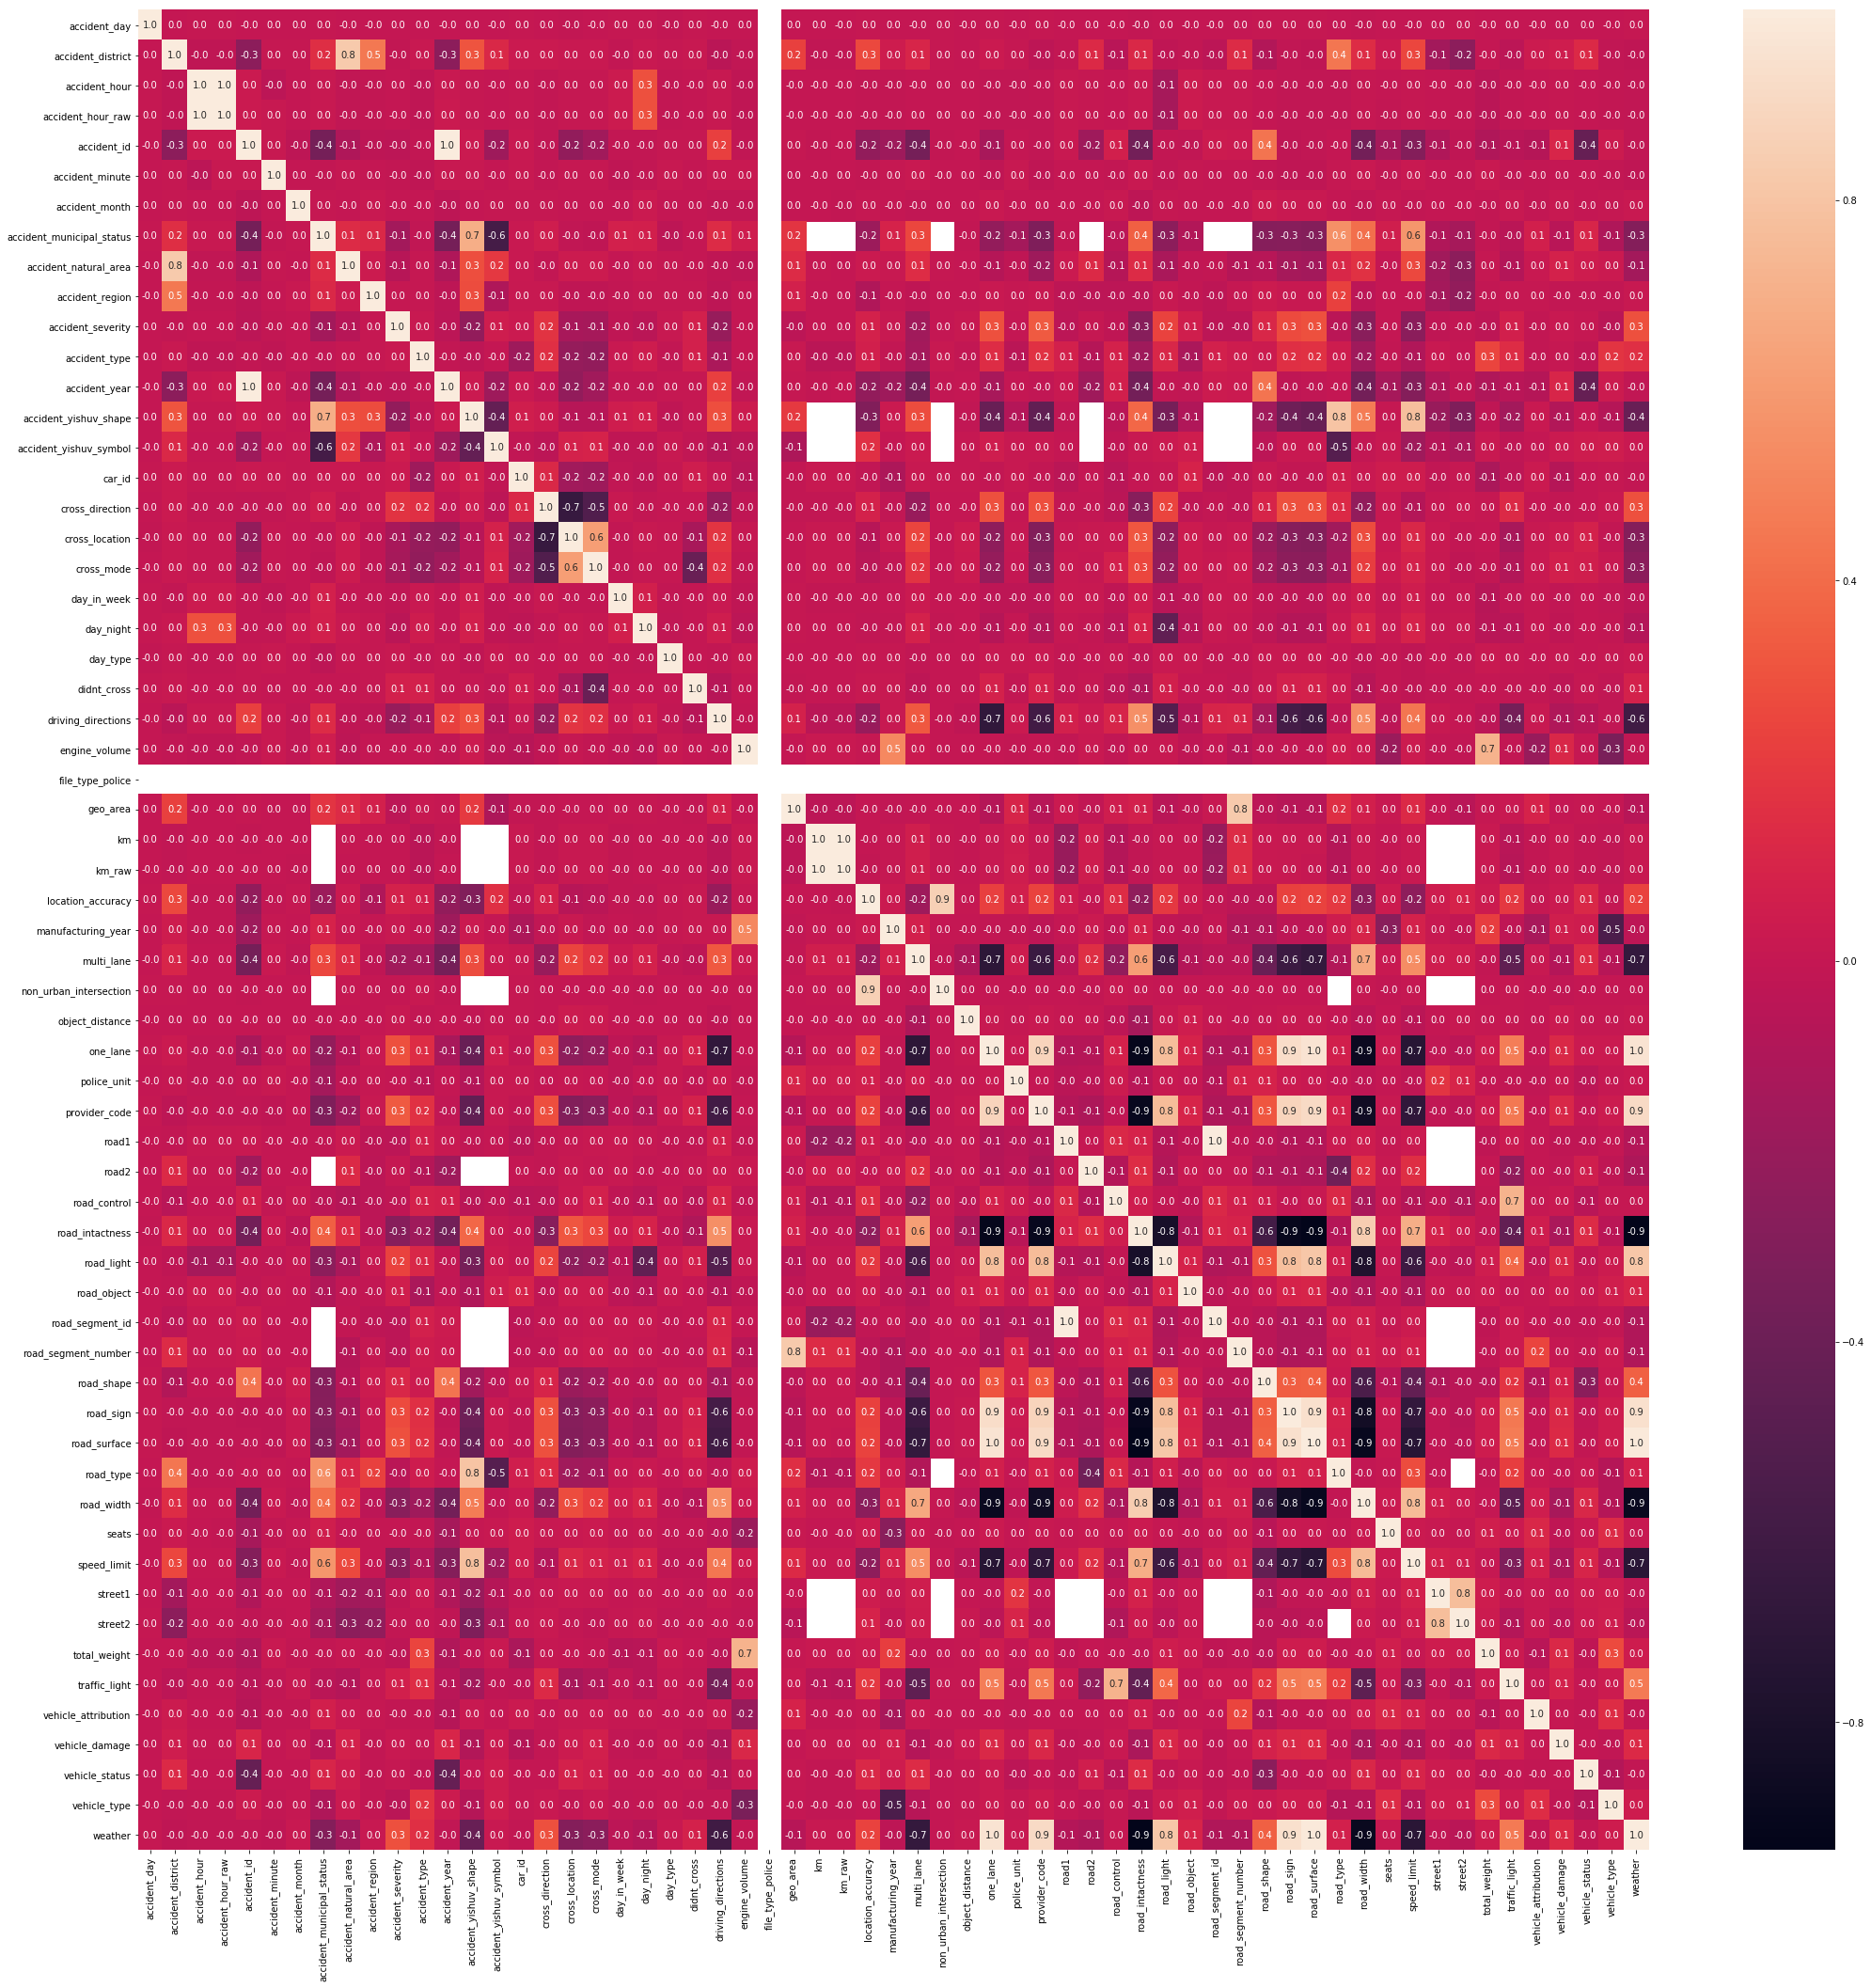

In [31]:
...
#  heatmap of correlation

f,ax = plt.subplots(figsize=(36, 36))
slinewidths=sns.heatmap(df_corr, annot=True , fmt= '.1f',ax=ax);


In [53]:

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})



In [54]:
import numpy as np
# 
df_corr = df_Acc.corr()

indices = np.where(df_corr > 0.5)
indices = [(df_Acc.columns[x], df_corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices


[('accident_district', 'accident_natural_area'),
 ('accident_district_hebrew', 'accident_hour_raw'),
 ('accident_hour_raw', 'accident_year'),
 ('accident_hour_raw', 'id'),
 ('accident_minute', 'accident_yishuv_shape'),
 ('accident_minute', 'road_type'),
 ('accident_minute', 'speed_limit'),
 ('accident_natural_area_hebrew', 'id'),
 ('accident_region', 'road_type'),
 ('accident_region', 'speed_limit'),
 ('accident_type', 'cross_mode'),
 ('accident_yishuv_symbol', 'road_intactness'),
 ('accident_yishuv_symbol', 'road_width'),
 ('car_id', 'manufacturing_year'),
 ('car_id', 'total_weight'),
 ('cross_direction_hebrew', 'road_segment_number'),
 ('cross_location_hebrew', 'km_raw'),
 ('cross_location_hebrew', 'road_segment_from_km'),
 ('cross_location_hebrew', 'road_segment_to_km'),
 ('cross_mode', 'road_segment_from_km'),
 ('cross_mode', 'road_segment_to_km'),
 ('cross_mode_hebrew', 'non_urban_intersection'),
 ('day_in_week_hebrew', 'road_intactness'),
 ('day_in_week_hebrew', 'road_width'),
 (

Text(0, 0.5, 'Num Acc')

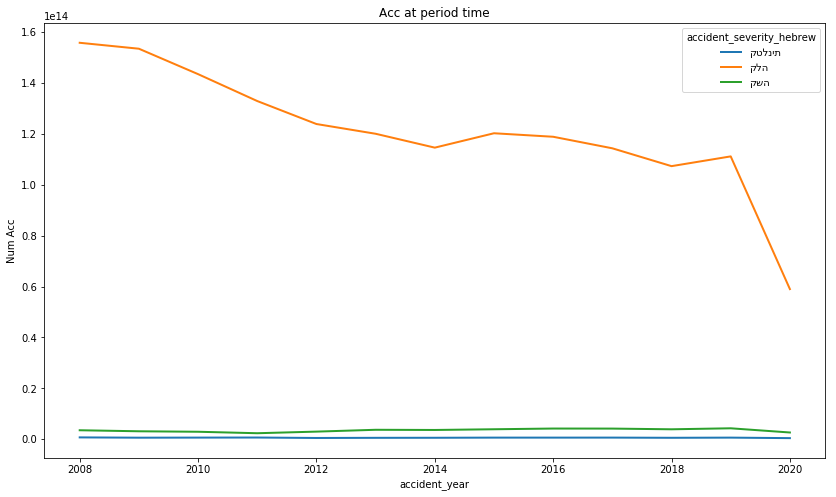

In [55]:

fig = df_Acc.groupby(['accident_year', 'accident_severity_hebrew'])['accident_id'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Acc at period time')
fig.set_ylabel('Num Acc')

Text(0, 0.5, 'Num Acc')

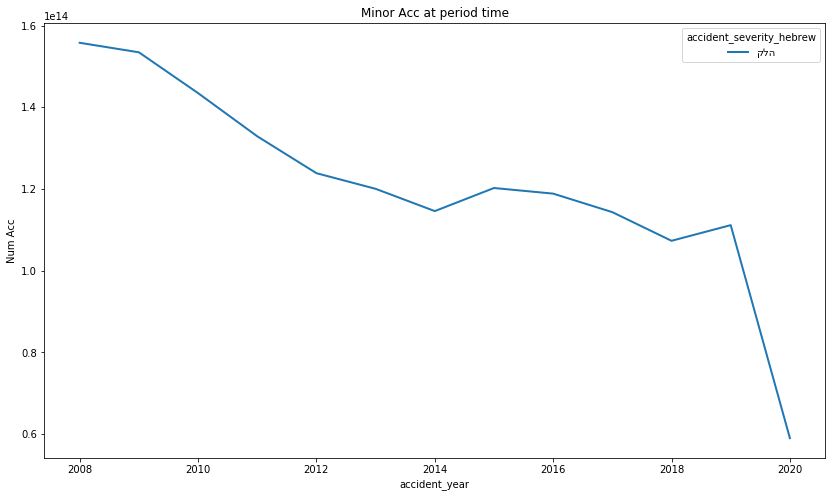

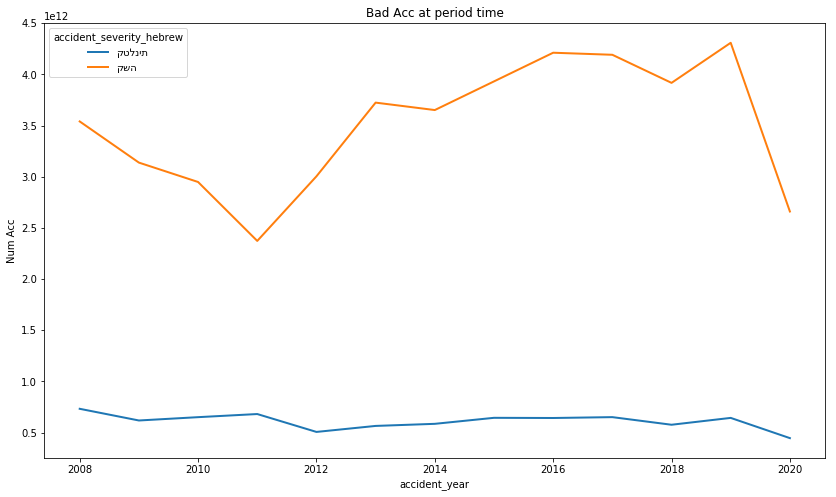

In [67]:
#  so I have to separate beiween the minor accidents  and the bad accidents

df_Acc_Minor = df_Acc[(df_Acc.accident_severity == 3) ]
df_Acc_Bad = df_Acc[(df_Acc.accident_severity != 3) ]

fig = df_Acc_Minor.groupby(['accident_year', 'accident_severity_hebrew'])['accident_id'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Minor Acc at period time')
fig.set_ylabel('Num Acc')

fig = df_Acc_Bad.groupby(['accident_year', 'accident_severity_hebrew'])['accident_id'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Bad Acc at period time')
fig.set_ylabel('Num Acc')


parameter Y get 3 values:
3
2
1
1=תאונה קטלנית
2=תאונה קשה
3=תאונה קלה

.

In [58]:
def missing_values_table(df): 
    mis_val = df.isnull().sum()
    #print(mis_val)
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns


In [61]:
def MissingMatrix(df=None):
    missingarr = df.isnull().sum()
    missingarr = missingarr.tolist()
    for (i, item) in enumerate(missingarr):
        if item > 0:
            missingarr[i] = 1
    

    matrixlen = len(missingarr)
    p_matrix= np.zeros(shape=(matrixlen,matrixlen))

    for col in  range(matrixlen ) :
        for col2 in range (matrixlen ) :
            val = (  0, 1) [ missingarr[col] > 0  or  missingarr[col2] > 0 ]
            p_matrix[col2,col] = val
    return p_matrix


In [62]:
import numpy  as np
import pandas as pd

numeric_cols = df_Acc.select_dtypes(include=np.number).columns.tolist()
data = df_Acc[numeric_cols].copy()

arr = MissingMatrix(data )

df = pd.DataFrame()
numpy_data = np.array(arr)
dfmissingvalues = pd.DataFrame(data=numpy_data,  columns=numeric_cols)



dfmissingvalues

,accident_day,accident_district,accident_hour,accident_hour_raw,accident_id,accident_minute,accident_month,accident_municipal_status,accident_natural_area,accident_region,accident_severity,accident_type,accident_year,accident_yishuv_shape,accident_yishuv_symbol,car_id,cross_direction,cross_location,cross_mode,day_in_week,day_night,day_type,didnt_cross,driving_directions,engine_volume,file_type_police,geo_area,id,km,km_raw,location_accuracy,manufacturing_year,multi_lane,non_urban_intersection,object_distance,one_lane,police_unit,provider_and_id,provider_code,road1,road2,road_control,road_intactness,road_light,road_object,road_segment_from_km,road_segment_id,road_segment_length_km,road_segment_number,road_segment_to_km,road_shape,road_sign,road_surface,road_type,road_width,seats,speed_limit,street1,street2,total_weight,traffic_light,vehicle_attribution,vehicle_damage,vehicle_status,vehicle_type,weather
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
62,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
63,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [63]:
# import seaborn as sns # data visualization library  
# import matplotlib.pyplot as plt
# import time

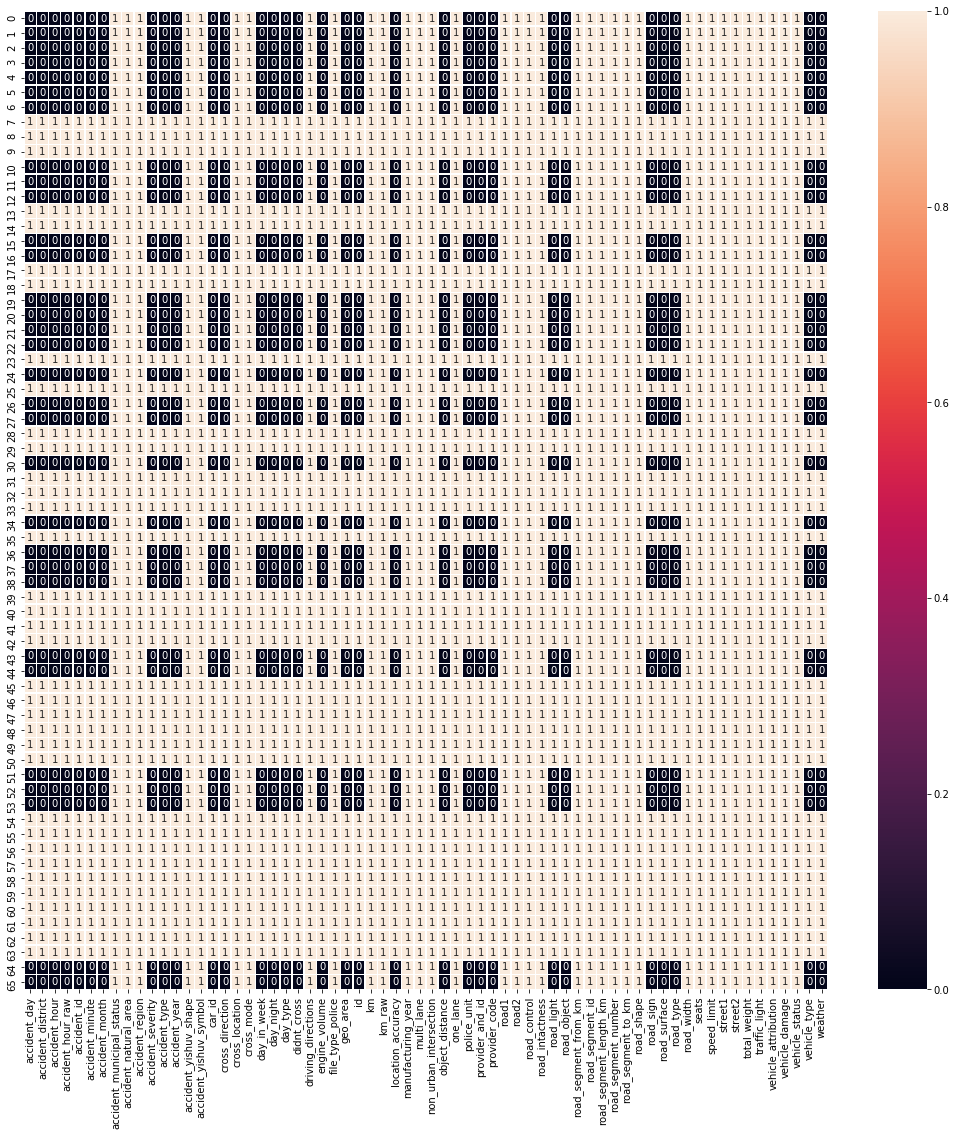

In [64]:

#missing  values matrix
f,ax = plt.subplots(figsize=(18, 18))
slinewidths=sns.heatmap(dfmissingvalues, annot=True, , fmt= '.0f',ax=ax);

In [65]:
# save the data
df_Acc.to_csv('../EDA1.csv', index=False)

In [66]:
df_Acc.shape

(808779, 114)